# Hans 2024 data v2

Let's take a look at the perplexity ratio score data generated with the v2 scoring algorithm.

In [1]:
# Change working directory to parent so we can import as we would from main.py
%cd ..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import configuration as config

/mnt/arkk/llm_detector/classifier


Load the scored text fragment data from the Hans 2024 corpus.

In [2]:
# Load the data
data_df = pd.read_json(f'{config.HANS_DATA_PATH}/falcon-7b_scores_v2.json')

# Replace and remove string 'OOM' and 'NAN' values
data_df.replace('NAN', np.nan, inplace = True)
data_df.replace('OOM', np.nan, inplace = True)
data_df.dropna(inplace = True)

# Shuffle the deck, resetting the index
data_df = data_df.sample(frac = 1).reset_index(drop = True)
data_df.reset_index(inplace = True, drop = True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Source record num               1854 non-null   int64  
 1   Fragment length (words)         1854 non-null   int64  
 2   Fragment length (tokens)        1854 non-null   int64  
 3   Dataset                         1854 non-null   object 
 4   Source                          1854 non-null   object 
 5   String                          1854 non-null   object 
 6   Reversed string                 1854 non-null   object 
 7   Perplexity                      1854 non-null   float64
 8   Reverse perplexity              1854 non-null   float64
 9   Cross-perplexity                1854 non-null   float64
 10  Reverse cross-perplexity        1854 non-null   float64
 11  Perplexity ratio score          1854 non-null   float64
 12  Reverse perplexity ratio score  18

Take a quick look for sanity...

In [3]:
# Get human and synthetic fragments
human_fragments = data_df[data_df['Source'] == 'human']
synthetic_fragments = data_df[data_df['Source'] == 'synthetic']

# Get the size of each
human_fragment_count = len(human_fragments)
synthetic_fragment_count = len(synthetic_fragments)

# And the percent synthetic
percent_synthetic = round((synthetic_fragment_count / (synthetic_fragment_count + human_fragment_count)) * 100, 1)

print(f'Have {human_fragment_count} human text fragments and {synthetic_fragment_count} synthetic fragments.')
print(f'Dataset is {percent_synthetic}% synthetic fragments.')

Have 927 human text fragments and 927 synthetic fragments.
Dataset is 50.0% synthetic fragments.


In [4]:
data_df.head()

,Source record num,Fragment length (words),Fragment length (tokens),Dataset,Source,String,Reversed string,Perplexity,Reverse perplexity,Cross-perplexity,Reverse cross-perplexity,Perplexity ratio score,Reverse perplexity ratio score,Reader time (seconds),Writer time (seconds),Reader peak memory (GB),Writer peak memory (GB)
0,437,182,223,cc_news,synthetic,to present any serious immediate threat to the...,countries the between dispute border (the purp...,2.428364,5.663672,3.072210,6.035220,0.790429,0.938437,20.770367,20.062083,91.123712,87.640064
1,262,263,351,cc_news,synthetic,about the experience.\n“I don’t like Jim Carr...,if other each hate really would I and he think...,2.152459,5.763570,2.681569,5.878087,0.802686,0.980518,30.103287,30.282562,91.977728,87.754752
2,403,31,43,cc_news,synthetic,a car with electric battery power but a gasoli...,— released.\nFord was report earnings its sinc...,3.480123,5.987054,3.851816,6.024993,0.903502,0.993703,5.704859,5.674738,89.280512,87.640064
3,61,137,189,cc_news,human,that share similar characteristics with them—a...,held summit NAM XVIIth the attend not did Modi...,2.885516,5.844457,2.762900,5.979685,1.044380,0.977385,18.219771,17.904058,90.773504,87.640064
4,493,47,54,cc_news,synthetic,between casino visits. But our experience pro...,"of look the has place the throughout, scattere...",2.926728,7.161527,3.527341,7.126631,0.829726,1.004897,7.017449,6.651723,88.967168,87.566336


In [5]:
data_df.tail()

,Source record num,Fragment length (words),Fragment length (tokens),Dataset,Source,String,Reversed string,Perplexity,Reverse perplexity,Cross-perplexity,Reverse cross-perplexity,Perplexity ratio score,Reverse perplexity ratio score,Reader time (seconds),Writer time (seconds),Reader peak memory (GB),Writer peak memory (GB)
1849,536,263,398,cc_news,human,PDT Partners LLC lifted its stake in shares of...,"12,933 additional an acquiring after $1,620,00...",0.784382,3.028130,0.835058,3.306415,0.939316,0.915835,36.682875,37.028242,92.479488,87.754752
1850,87,320,436,cc_news,synthetic,final event — the first Stanley Cup Final in t...,week this than rather Game All-Star the to ref...,2.103577,5.866483,2.588318,5.996091,0.812720,0.978385,40.889775,40.719107,93.050880,87.754752
1851,372,197,268,cc_news,synthetic,"zookeeper.\nFor years, Anna has fought to keep...","delighted is Anna town, the of outskirts the o...",2.466610,5.943595,3.032312,6.204423,0.813442,0.957961,24.191811,23.649963,89.081856,87.754752
1852,369,350,477,cc_news,human,"efficient potable water supply, water transpor...",Facebook\nTwitter\nWhatsApp\nEmail\nGoogle\nTu...,2.662397,5.829788,2.672543,5.707864,0.996204,1.021361,45.000535,44.987985,93.966336,87.754752
1853,56,23,29,cc_news,human,Get daily updates directly to your inbox + Sub...,man Ashford Email\nAn Invalid later again try ...,2.581248,7.281610,3.089381,6.422211,0.835523,1.133817,5.084619,5.013015,88.967168,87.566336


Make some plots with perplexity ratio score and related variables to what we have.

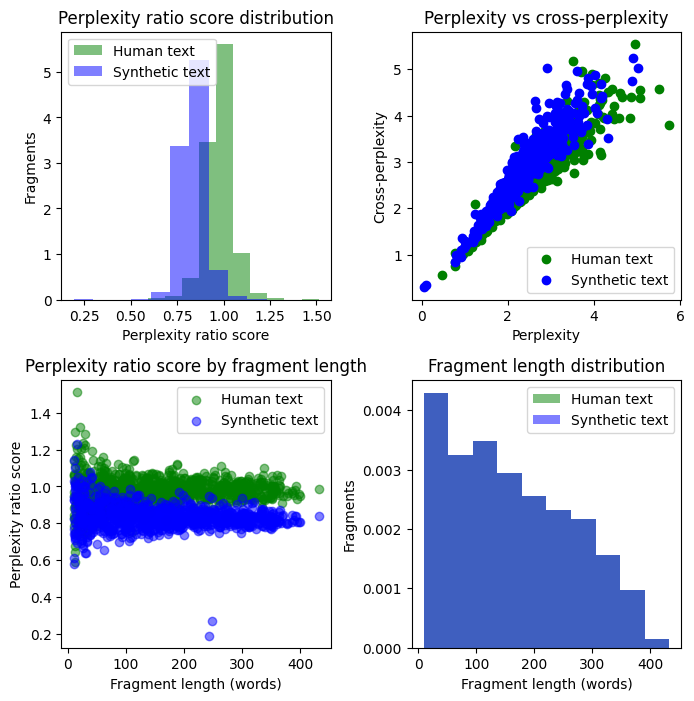

In [6]:
# Set up a 2 x 2 figure for some diagnostic plots
fig, axs = plt.subplots(
    2,
    2,
    figsize = (8, 8),
    gridspec_kw = {'wspace':0.3, 'hspace':0.3}
)

# Plot distribution of perplexity ratio scores
axs[0,0].set_title('Perplexity ratio score distribution')
axs[0,0].hist(human_fragments['Perplexity ratio score'], density = True, facecolor = 'green', label = 'Human text', alpha = 0.5)
axs[0,0].hist(synthetic_fragments['Perplexity ratio score'], density = True, facecolor = 'blue', label = 'Synthetic text', alpha = 0.5)
axs[0,0].legend(loc = 'upper left')
axs[0,0].set_xlabel('Perplexity ratio score')
axs[0,0].set_ylabel('Fragments')

# Scatter plot of perplexity vs cross-perplexity
axs[0,1].set_title('Perplexity vs cross-perplexity')
axs[0,1].scatter(human_fragments['Perplexity'], human_fragments['Cross-perplexity'], c = 'green', label = 'Human text')
axs[0,1].scatter(synthetic_fragments['Perplexity'], synthetic_fragments['Cross-perplexity'], c = 'blue', label = 'Synthetic text')
axs[0,1].legend(loc = 'lower right')
axs[0,1].set_xlabel('Perplexity')
axs[0,1].set_ylabel('Cross-perplexity')

# Scatter plot of perplexity ratio score as a function of the
# the text fragment length
axs[1,0].set_title('Perplexity ratio score by fragment length')
axs[1,0].scatter(human_fragments['Fragment length (words)'], human_fragments['Perplexity ratio score'], c = 'green', alpha = 0.5, label = 'Human text')
axs[1,0].scatter(synthetic_fragments['Fragment length (words)'], synthetic_fragments['Perplexity ratio score'], c = 'blue', alpha = 0.5, label = 'Synthetic text')
axs[1,0].legend(loc = 'upper right')
axs[1,0].set_xlabel('Fragment length (words)')
axs[1,0].set_ylabel('Perplexity ratio score')

# Plot length distributions for human and synthetic text fragments
axs[1,1].set_title('Fragment length distribution')
axs[1,1].hist(human_fragments['Fragment length (words)'], density = True, facecolor = 'green', label = 'Human text', alpha = 0.5)
axs[1,1].hist(synthetic_fragments['Fragment length (words)'], density = True, facecolor = 'blue', label = 'Synthetic text', alpha = 0.5)
axs[1,1].legend(loc = 'upper right')
axs[1,1].set_xlabel('Fragment length (words)')
axs[1,1].set_ylabel('Fragments')

plt.show()

Same plots as above, but with perplexity values calculated on the reversed text fragments.

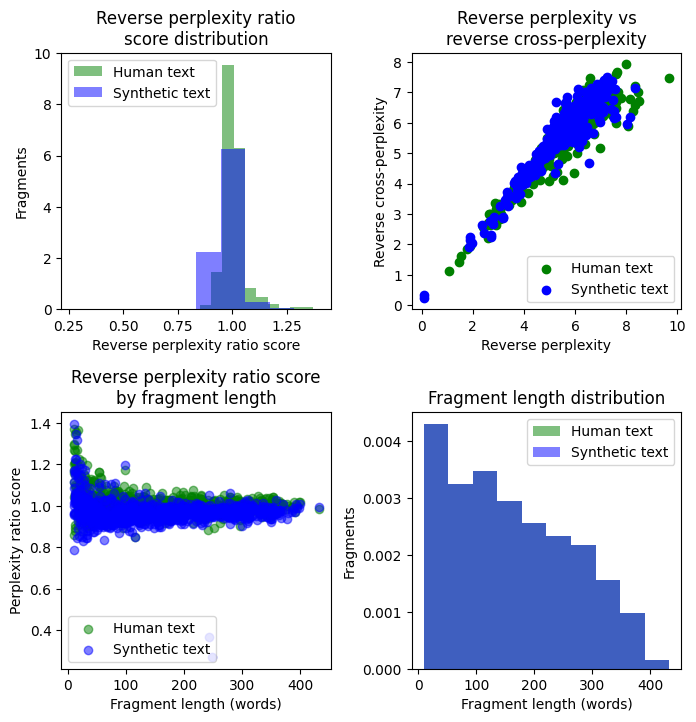

In [7]:
# Set up a 2 x 2 figure for some diagnostic plots
fig, axs = plt.subplots(
    2,
    2,
    figsize = (8, 8),
    gridspec_kw = {'wspace':0.3, 'hspace':0.4}
)

# Plot distribution of perplexity ratio scores
axs[0,0].set_title('Reverse perplexity ratio\nscore distribution')
axs[0,0].hist(human_fragments['Reverse perplexity ratio score'], density = True, facecolor = 'green', label = 'Human text', alpha = 0.5)
axs[0,0].hist(synthetic_fragments['Reverse perplexity ratio score'], density = True, facecolor = 'blue', label = 'Synthetic text', alpha = 0.5)
axs[0,0].legend(loc = 'upper left')
axs[0,0].set_xlabel('Reverse perplexity ratio score')
axs[0,0].set_ylabel('Fragments')

# Scatter plot of perplexity vs cross-perplexity
axs[0,1].set_title('Reverse perplexity vs\nreverse cross-perplexity')
axs[0,1].scatter(human_fragments['Reverse perplexity'], human_fragments['Reverse cross-perplexity'], c = 'green', label = 'Human text')
axs[0,1].scatter(synthetic_fragments['Reverse perplexity'], synthetic_fragments['Reverse cross-perplexity'], c = 'blue', label = 'Synthetic text')
axs[0,1].legend(loc = 'lower right')
axs[0,1].set_xlabel('Reverse perplexity')
axs[0,1].set_ylabel('Reverse cross-perplexity')

# Scatter plot of perplexity ratio score as a function of the
# the text fragment length
axs[1,0].set_title('Reverse perplexity ratio score\nby fragment length')
axs[1,0].scatter(human_fragments['Fragment length (words)'], human_fragments['Reverse perplexity ratio score'], c = 'green', alpha = 0.5, label = 'Human text')
axs[1,0].scatter(synthetic_fragments['Fragment length (words)'], synthetic_fragments['Reverse perplexity ratio score'], c = 'blue', alpha = 0.5, label = 'Synthetic text')
axs[1,0].legend(loc = 'lower left')
axs[1,0].set_xlabel('Fragment length (words)')
axs[1,0].set_ylabel('Perplexity ratio score')

# Plot length distributions for human and synthetic text fragments
axs[1,1].set_title('Fragment length distribution')
axs[1,1].hist(human_fragments['Fragment length (words)'], density = True, facecolor = 'green', label = 'Human text', alpha = 0.5)
axs[1,1].hist(synthetic_fragments['Fragment length (words)'], density = True, facecolor = 'blue', label = 'Synthetic text', alpha = 0.5)
axs[1,1].legend(loc = 'upper right')
axs[1,1].set_xlabel('Fragment length (words)')
axs[1,1].set_ylabel('Fragments')

plt.show()

OK, don't think we will be using the reversed perplexity ratio score. Should probably remove it from the scoring algorithm as well, will cut the computational load in half. Next, let's split the data in to training and testing subsets. This way as we do the feature engineering steps we are not leaking data.

In [8]:
# Remove some features we will not use for feature engineering or training
data_df.drop(
    [
        'Source record num', 
        'Dataset',
        'Reversed string',
        'Reverse perplexity',
        'Reverse cross-perplexity',
        'Reverse perplexity ratio score',
        'Reader time (seconds)', 
        'Writer time (seconds)', 
        'Reader peak memory (GB)', 
        'Writer peak memory (GB)'
    ], 
    axis = 1, 
    inplace = True
)

training_df = data_df.sample(frac = 0.8, random_state = 42)
testing_df = data_df.drop(training_df.index)

training_df.reset_index(inplace = True, drop = True)
testing_df.reset_index(inplace = True, drop = True)

print(f'Have {len(training_df)} training examples')
print(f'Have {len(testing_df)} testing examples')
print()
testing_df.info()

Have 1483 training examples
Have 371 testing examples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fragment length (words)   371 non-null    int64  
 1   Fragment length (tokens)  371 non-null    int64  
 2   Source                    371 non-null    object 
 3   String                    371 non-null    object 
 4   Perplexity                371 non-null    float64
 5   Cross-perplexity          371 non-null    float64
 6   Perplexity ratio score    371 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.4+ KB


And finally, save the split data for future use.

In [9]:
# Save training data
output_file = config.COMBINED_SCORED_HANS_TRAINING_DATA

with open(output_file, 'w') as file:
    file.write(training_df.to_json())

# Save testing data
output_file = config.COMBINED_SCORED_HANS_TESTING_DATA

with open(output_file, 'w') as file:
    file.write(testing_df.to_json())